# 1. 데이터 전처리

In [1]:
import pandas as pd

import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

import platform
platform.system()

# 운영체제별 한글 폰트 설정
if platform.system() == 'Darwin': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif platform.system() == 'Windows': # Windows 환경 폰트 설정
    plt.rc('font', family='NanumGothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정


import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

matplotlib.rc("axes", unicode_minus = False)

In [4]:
df = pd.read_csv("Car.csv")
df.head(3)

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,Maruti Wagon R LXI CNG,Mumbai,2682.68,2010,72000,CNG,Manual,First,26.6 kmpl,998 CC,58.16 bhp,5.0,NaN
1,Hyundai Creta 1.6 CRDi SX Option,Pune,19162.00,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,Honda Jazz V,Chennai,6898.32,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh


In [5]:
# 수치형 값과 문자형 값을 구분
df[['Mileage_kmpl','Mileage']]= df['Mileage'].str.split(expand=True)
df[['Engine_CC','Engine']]= df['Engine'].str.split(expand=True)
df[['Power_bhp','Power']]= df['Power'].str.split(expand=True)
df[['New_Price_Lakh','New_Price']]= df['New_Price'].str.split(expand=True)

In [6]:
# 수치형 변수 float형으로 변환

df['Mileage_kmpl'] = df['Mileage_kmpl'].astype('float')
df['Engine_CC'] = df['Engine_CC'].astype('float')
df['Power_bhp'] = df['Power_bhp'].replace('null', np.nan)
df['Power_bhp'] = df['Power_bhp'].astype('float')

df['New_Price_Lakh'] = df['New_Price_Lakh'].replace('null', np.nan)
df['New_Price_Lakh'] = df['New_Price_Lakh'].astype('float')

In [7]:
# 문자형 값을 나타낸 열 제거

df.drop(columns=['Mileage','Engine','Power','New_Price'], inplace=True)

### 이상치, 결측치 확인 및 제거

In [8]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Seats              7200 non-null   float64
 9   Mileage_kmpl       7251 non-null   float64
 10  Engine_CC          7207 non-null   float64
 11  Power_bhp          7078 non-null   float64
 12  New_Price_Lakh     1006 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 736.8+ KB


Name                    0
Location                0
Price                1053
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
Mileage_kmpl            2
Engine_CC              46
Power_bhp             175
New_Price_Lakh       6247
dtype: int64

In [9]:
df_train = df[df['Price'].notnull()]
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6200 entries, 0 to 7236
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6200 non-null   object 
 1   Location           6200 non-null   object 
 2   Price              6200 non-null   float64
 3   Year               6200 non-null   int64  
 4   Kilometers_Driven  6200 non-null   int64  
 5   Fuel_Type          6200 non-null   object 
 6   Transmission       6200 non-null   object 
 7   Owner_Type         6200 non-null   object 
 8   Seats              6158 non-null   float64
 9   Mileage_kmpl       6198 non-null   float64
 10  Engine_CC          6164 non-null   float64
 11  Power_bhp          6057 non-null   float64
 12  New_Price_Lakh     1005 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 678.1+ KB


In [10]:
df_train[df_train['Name']=='Honda City 1.5 GXI'] # 전체 데이터에서 모델명이 동일하면 좌석, 엔진, 파워 동일하게 채움
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Seats'] = 5.0
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Mileage_kmpl'] = 12.8
df_train.loc[df_train['Name']=='Honda City 1.5 GXI', 'Power_bhp'] = 100.0

In [11]:
df_train[df_train['Name']=='Toyota Etios Liva V'] # 전체 데이터에서 모델명이 동일하면 좌석, 엔진, 파워 동일하게 채움
df_train.loc[df_train['Name']=='Toyota Etios Liva V', 'Seats'] = 5.0
df_train.loc[(df_train['Name']=='Toyota Etios Liva V') & (df_train['Engine_CC'].isnull()), 'Engine_CC'] = round((1197.0*1.033),0) # 동일한 모델이지만 마일값이 1.03배 만큼 차이남
df_train.loc[(df_train['Name']=='Toyota Etios Liva V') & (df_train['Power_bhp'].isnull()), 'Power_bhp'] = round((78.9*1.033),1)        # 엔진, 파워도 1.03배 만큼 증가시킴

In [12]:
df_train[df_train['Name']=='Toyota Etios Liva V']

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh
2264,Toyota Etios Liva V,Pune,4522.23,2012,24500,Petrol,Manual,Second,5.0,18.30,1237.0,81.5,NaN
4138,Toyota Etios Liva V,Mumbai,5442.01,2013,8950,Petrol,Manual,First,5.0,17.71,1197.0,78.9,NaN


In [13]:
df_train[['Brand' , 'Name']] = df_train['Name'].str.split(n=1, expand=True)

In [14]:
df_train = df_train[df_train.groupby('Brand')['Brand'].transform('size') >= 50]
df_train = df_train[df_train.groupby('Year')['Year'].transform('size') >= 50]

In [15]:
# 같은 제조사의 같은 시리즈 명의 엔진, 좌석, 파워의 평균을 넣어준다.

# Swift_Mil_mean=df_train[df_train['Name'].str.contains('Swift')]['Mileage_kmpl'].mean()
Swift_Seat = df_train[df_train['Name'].str.contains('Swift')]['Seats'].mean() # 5밖에 없어서 5임
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Swift')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Swift')]['Power_bhp'].mean()

In [16]:
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Swift')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean

In [17]:
df_train[(df_train['Name'].str.contains('Swift')) & (df_train['Engine_CC'].isnull())]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand


In [18]:
df_train[df_train['Engine_CC'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand
194,City 1.5 GXI,Ahmedabad,4522.23,2007,60006,Petrol,Manual,First,5.0,12.80,NaN,100.0,NaN,Honda
749,Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,NaN,0.00,NaN,NaN,NaN,Land
1294,City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,NaN,12.80,NaN,NaN,NaN,Honda
1460,Rover Range Rover Sport 2005 2012 Sport,Coimbatore,62667.40,2008,69078,Petrol,Manual,First,NaN,0.00,NaN,NaN,NaN,Land
2530,5 Series 520d Sedan,Kochi,27424.65,2014,64158,Diesel,Automatic,First,NaN,18.48,NaN,NaN,NaN,BMW
2542,Santro GLS II - Euro II,Bangalore,4828.82,2011,65000,Petrol,Manual,Second,NaN,0.00,NaN,NaN,NaN,Hyundai
2623,5 Series 520d Sedan,Pune,27593.28,2012,95000,Diesel,Automatic,Second,NaN,18.48,NaN,NaN,NaN,BMW
2780,Santro GLS II - Euro II,Pune,2452.74,2009,100000,Petrol,Manual,First,NaN,0.00,NaN,NaN,NaN,Hyundai
2842,Santro GLS II - Euro II,Bangalore,4982.12,2012,43000,Petrol,Manual,First,NaN,0.00,NaN,NaN,NaN,Hyundai
3272,5 Series 520d Sedan,Mumbai,16096.08,2008,81000,Diesel,Automatic,Second,NaN,18.48,NaN,NaN,NaN,BMW


In [19]:
# City 1.5 GXI 차량의 Engine 결측값 대체

df_train.loc[(df_train['Name'].str.contains('City 1.5 GXI')), 'Engine_CC'] = 1493.0

In [20]:
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Engine_CC'].isnull()),'Engine_CC' ] = 1995.0
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Power_bhp'].isnull()),'Power_bhp' ] = 190.00
df_train.loc[(df_train['Name'].str.contains('5 Series 520d'))& (df_train['Seats'].isnull()),'Seats' ] = 5.0

In [21]:
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Engine_CC'].isnull()),'Engine_CC'] = 1086.0
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Power_bhp'].isnull()),'Power_bhp'] = 62
df_train.loc[(df_train['Name'].str.contains('Santro'))& (df_train['Mileage_kmpl']==0),'Mileage_kmpl'] = 17.92

In [22]:
df_train[df_train['Power_bhp'].isnull()]

,Name,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh,Brand
76,Fiesta 1.4 SXi TDCi,Jaipur,3065.92,2008,111111,Diesel,Manual,First,5.0,17.80,1399.0,NaN,NaN,Ford
424,Jetta 2007-2011 1.9 L TDI,Hyderabad,8354.63,2010,42021,Diesel,Manual,First,5.0,0.00,1968.0,NaN,NaN,Volkswagen
472,Fiesta 1.6 SXI ABS Duratec,Chennai,3832.40,2009,80524,Petrol,Manual,Second,5.0,15.30,1596.0,NaN,NaN,Ford
648,Indica DLS,Jaipur,1149.72,2009,82000,Diesel,Manual,Second,5.0,13.50,1405.0,NaN,NaN,Tata
749,Rover Range Rover 3.0 D,Mumbai,40623.44,2008,55001,Diesel,Automatic,Second,NaN,0.00,NaN,NaN,NaN,Land
829,Etios Liva G,Mumbai,3740.42,2012,29605,Petrol,Manual,First,5.0,18.30,1197.0,NaN,NaN,Toyota
934,Etios GD,Kolkata,4522.23,2012,60000,Diesel,Manual,First,5.0,23.59,1364.0,NaN,NaN,Toyota
1068,Etios Liva GD,Pune,3985.70,2012,225000,Diesel,Manual,Second,5.0,23.59,1364.0,NaN,NaN,Toyota
1294,City 1.3 DX,Delhi,4905.47,2009,55005,Petrol,Manual,First,NaN,12.80,NaN,NaN,NaN,Honda
1345,Baleno Vxi,Pune,1992.85,2005,70000,Petrol,Manual,First,5.0,0.00,1590.0,NaN,NaN,Maruti


In [23]:
Swift_Seat = df_train[df_train['Name'].str.contains('Etios')]['Seats'].mode()[0] 
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Etios')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Etios')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Etios')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Etios')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [24]:
Swift_Seat = df_train[df_train['Name'].str.contains('Fiesta')]['Seats'].mode()[0] # 5밖에 없어서 5임
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Fiesta')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Fiesta')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Fiesta')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Fiesta')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [25]:
df_train[df_train['Power_bhp'].isnull()]['Name'].value_counts()

Estilo LXI                                 3
Indica DLS                                 3
Jetta 2007-2011 1.9 L TDI                  1
CR-V Sport                                 1
Endeavour XLT TDCi 4X4                     1
E-Class 220 CDI                            1
Jazz Select Edition                        1
Baleno LXI - BSIII                         1
A4 3.2 FSI Tiptronic Quattro               1
CR-V AT With Sun Roof                      1
Endeavour Hurricane LE                     1
Esteem Vxi                                 1
Teana 230jM                                1
Jeep MM 550 PE                             1
Micra Diesel                               1
Bolero ZLX                                 1
Optra 1.6 Elite                            1
Rover Range Rover Sport 2005 2012 Sport    1
Baleno Vxi                                 1
City 1.3 DX                                1
Rover Range Rover 3.0 D                    1
Laura Classic 1.8 TSI                      1
Name: Name

In [26]:
Swift_Seat = df_train[df_train['Name'].str.contains('Indica')]['Seats'].mode()[0] # 5밖에 없어서 5임
Swift_Engine_mean = df_train[df_train['Name'].str.contains('Indica')]['Engine_CC'].mean() # 평균들을 다 구해준다.
Swift_Power_mean = df_train[df_train['Name'].str.contains('Indica')]['Power_bhp'].mean()
Swift_Mil_mode = df_train[df_train['Name'].str.contains('Indica')]['Mileage_kmpl'].mode()[0]

df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Engine_CC'].isnull()), 'Engine_CC']= Swift_Engine_mean
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Seats'].isnull()), 'Seats']= Swift_Seat
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Power_bhp'].isnull()), 'Power_bhp']= Swift_Power_mean
df_train.loc[(df_train['Name'].str.contains('Indica')) & (df_train['Mileage_kmpl']==0), 'Mileage_kmpl']= Swift_Mil_mode

In [27]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5901 entries, 0 to 7236
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5901 non-null   object 
 1   Location           5901 non-null   object 
 2   Price              5901 non-null   float64
 3   Year               5901 non-null   int64  
 4   Kilometers_Driven  5901 non-null   int64  
 5   Fuel_Type          5901 non-null   object 
 6   Transmission       5901 non-null   object 
 7   Owner_Type         5901 non-null   object 
 8   Seats              5885 non-null   float64
 9   Mileage_kmpl       5899 non-null   float64
 10  Engine_CC          5896 non-null   float64
 11  Power_bhp          5878 non-null   float64
 12  New_Price_Lakh     924 non-null    float64
 13  Brand              5901 non-null   object 
dtypes: float64(6), int64(2), object(6)
memory usage: 691.5+ KB


In [28]:
df_train.corr()

,Price,Year,Kilometers_Driven,Seats,Mileage_kmpl,Engine_CC,Power_bhp,New_Price_Lakh
Price,1.000000,0.305209,0.002623,0.103620,-0.333777,0.637293,0.755078,0.716036
Year,0.305209,1.000000,-0.166967,0.015403,0.287444,-0.065361,0.010020,-0.021613
Kilometers_Driven,0.002623,-0.166967,1.000000,0.079241,-0.062038,0.100451,0.043398,0.033370
Seats,0.103620,0.015403,0.079241,1.000000,-0.352125,0.444276,0.149466,0.011405
Mileage_kmpl,-0.333777,0.287444,-0.062038,-0.352125,1.000000,-0.644598,-0.550340,-0.334119
Engine_CC,0.637293,-0.065361,0.100451,0.444276,-0.644598,1.000000,0.861389,0.608717
Power_bhp,0.755078,0.010020,0.043398,0.149466,-0.550340,0.861389,1.000000,0.725982
New_Price_Lakh,0.716036,-0.021613,0.033370,0.011405,-0.334119,0.608717,0.725982,1.000000


In [29]:
df_train = df_train.drop(df_train[df_train['Seats']==0].index) # seats가 0인 값 제거
df_train = df_train.drop(df_train[df_train['Mileage_kmpl']<5].index) # mileage <5 제거

In [30]:
df_train.drop(columns="New_Price_Lakh", inplace=True)

In [31]:
df_train.isnull().sum()
df_train.dropna(subset=['Price'], inplace=True)

In [32]:
df_train.isnull().sum()

Name                  0
Location              0
Price                 0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Seats                13
Mileage_kmpl          2
Engine_CC             3
Power_bhp            17
Brand                 0
dtype: int64

In [33]:
df_train.dropna(subset="Power_bhp",inplace=True)
df_train['Seats'].fillna(df_train['Seats'].mode()[0], inplace=True) 
df_train.dropna(subset="Mileage_kmpl",inplace=True)

In [34]:
df_train.isnull().sum()

Name                 0
Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Brand                0
dtype: int64

<Axes: >

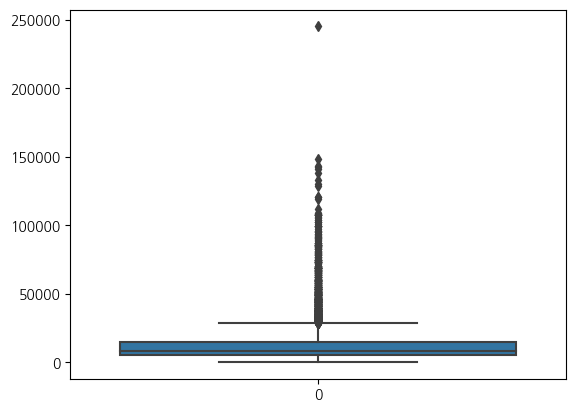

In [35]:
sns.boxplot(df_train['Price'])

In [36]:
df_train.drop(df_train[df_train['Price']>160000].index, inplace=True) # 주행거리 이상치 제거

<Axes: >

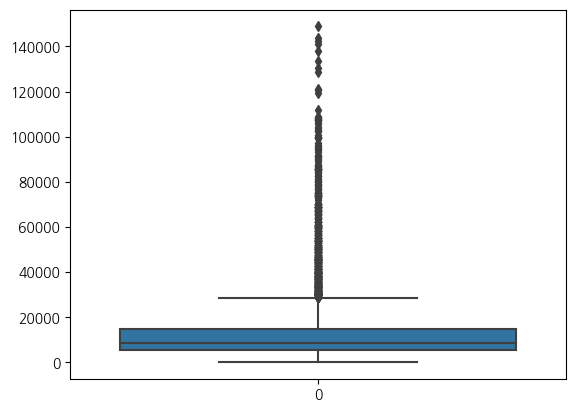

In [37]:
sns.boxplot(df_train['Price'])

In [38]:
df_train.drop(columns="Name", inplace=True) # 이름 변수 제거

<Axes: >

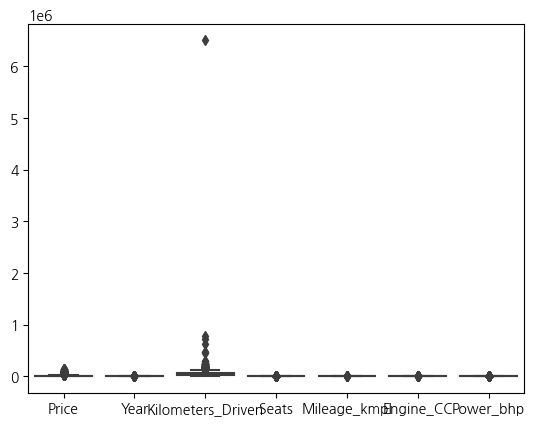

In [39]:
sns.boxplot(df_train)

<Axes: xlabel='Kilometers_Driven'>

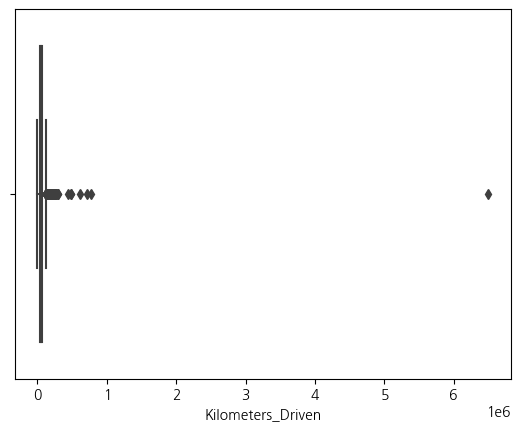

In [40]:
sns.boxplot(x="Kilometers_Driven", data=df_train)

In [41]:
df_train.drop(df_train[df_train['Kilometers_Driven']>3000000].index, inplace=True) # 주행거리 이상치 제거

<Axes: xlabel='Kilometers_Driven'>

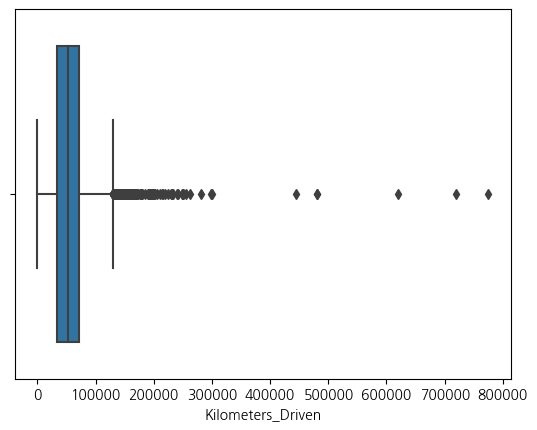

In [42]:
sns.boxplot(x="Kilometers_Driven", data=df_train)

<Axes: xlabel='Price', ylabel='Count'>

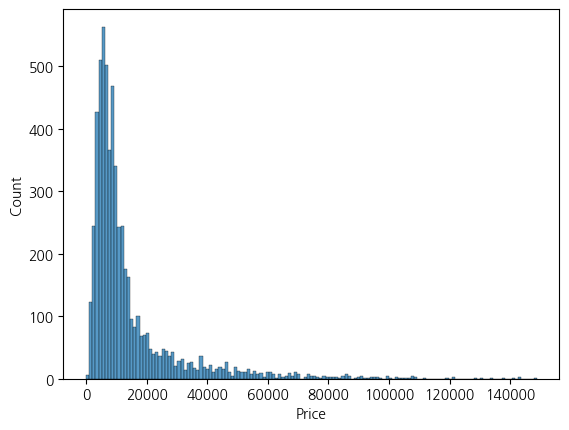

In [43]:
sns.histplot(x="Price", data=df_train) # 변환 필요해 보임

### 파생변수 추가

In [44]:
df_train['Brand'].value_counts()

Maruti           1217
Hyundai          1117
Honda             609
Toyota            415
Volkswagen        320
Mercedes-Benz     307
Ford              297
Mahindra          277
BMW               272
Audi              239
Tata              193
Skoda             176
Renault           151
Chevrolet         119
Nissan             93
Land               50
Name: Brand, dtype: int64

In [45]:
df_train.loc[df_train['Year']<=2012,'Year_cat'] = "2012이전"
df_train.loc[df_train['Year']>2012,'Year_cat'] = "2012이후"

In [46]:
df_train.loc[df_train['Engine_CC']<1000,'car_cat'] = "경차"
df_train.loc[(df_train['Engine_CC']>=1000) & (df_train['Engine_CC']<1600),'car_cat'] = "소형"
df_train.loc[(df_train['Engine_CC']>=1600) & (df_train['Engine_CC']<2000),'car_cat'] = "중형"
df_train.loc[df_train['Engine_CC']>=2000,'car_cat'] = "대형"

In [47]:
df_train['연식'] = 2020 - df_train['Year']

In [48]:
year_mean=df_train.groupby(['연식'])['Price'].mean().round(3).reset_index()
year_mean.columns = ['연식', '연식_mean']

In [49]:
df_train=pd.merge(df_train, year_mean, on="연식", how='left')
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072


In [50]:
df_train.loc[(df_train['Kilometers_Driven']/df_train['연식'])>12000, '가성비']='bad'
df_train.loc[(df_train['Kilometers_Driven']/df_train['연식'])<=12000, '가성비']='good'
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414,good
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351,bad
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594,good
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072,bad
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072,good


In [51]:
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414,good
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351,bad
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594,good
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072,bad
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072,good


<Axes: xlabel='Mileage_kmpl'>

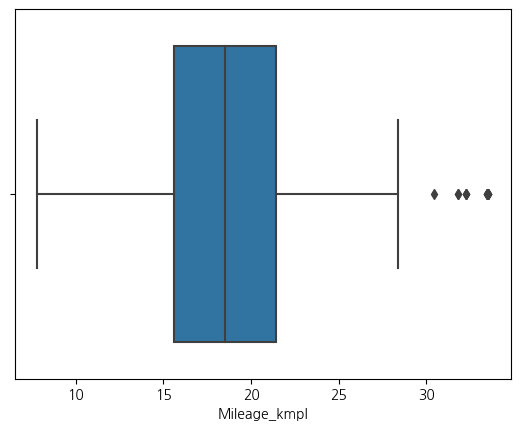

In [52]:
sns.boxplot(x="Mileage_kmpl",data=df_train)

In [53]:
df_train.loc[(df_train['Mileage_kmpl']>=15), 'Mil_cat'] = '1등급' # 연비가 15이상이면 1등급
df_train.loc[(df_train['Mileage_kmpl']<15), 'Mil_cat'] = '2등급 이하' #연비가 15미만이면 2등급 이하
df_train.head(3)

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비,Mil_cat
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good,1등급
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good,1등급
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good,1등급


In [54]:
# # 연비 그룹 3개로 나눔
# df_train['Mileage_Group'] = pd.cut(df_train['Mileage_kmpl'], bins=3, labels=['Low', 'Medium', 'High'])
# grouped = df_train.groupby('Mileage_Group')['Price'].mean().round(3).reset_index() 
# grouped.columns = ['Mileage_Group', 'Mileage_Group_mean']
 
# df_train=pd.merge(df_train, grouped, on="Mileage_Group", how='left')
# df_train

In [55]:
grouped = df_train.groupby('Mil_cat')['Price'].mean().round(3).reset_index() # 2개 등급으로 나눔
grouped.columns = ['Mil_cat', 'Mil_cat_mean']
 
df_train=pd.merge(df_train, grouped, on="Mil_cat", how='left')
df_train

,Location,Price,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Mileage_kmpl,Engine_CC,Power_bhp,Brand,Year_cat,car_cat,연식,연식_mean,가성비,Mil_cat,Mil_cat_mean
0,Mumbai,2682.68,2010,72000,CNG,Manual,First,5.0,26.60,998.0,58.16,Maruti,2012이전,경차,10,8089.378,good,1등급,11458.408
1,Pune,19162.00,2015,41000,Diesel,Manual,First,5.0,19.67,1582.0,126.20,Hyundai,2012이후,소형,5,15921.566,good,1등급,11458.408
2,Chennai,6898.32,2011,46000,Petrol,Manual,First,5.0,18.20,1199.0,88.70,Honda,2012이전,소형,9,10227.566,good,1등급,11458.408
3,Chennai,9197.76,2012,87000,Diesel,Manual,First,7.0,20.77,1248.0,88.76,Maruti,2012이전,소형,8,10805.414,good,1등급,11458.408
4,Coimbatore,27194.71,2013,40670,Diesel,Automatic,Second,5.0,15.20,1968.0,140.80,Audi,2012이후,중형,7,12459.628,good,1등급,11458.408
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5847,Coimbatore,19437.93,2018,31542,Petrol,Manual,First,5.0,17.40,1497.0,117.30,Honda,2012이후,소형,2,23122.351,bad,1등급,11458.408
5848,Pune,10822.70,2016,41413,Diesel,Manual,First,5.0,27.28,1047.0,69.00,Tata,2012이후,소형,4,17718.594,good,1등급,11458.408
5849,Kochi,13474.72,2017,39015,Petrol,Manual,First,5.0,17.00,1497.0,121.36,Ford,2012이후,소형,3,20345.072,bad,1등급,11458.408
5850,Kochi,16203.39,2017,21380,Diesel,Manual,First,5.0,24.30,1248.0,88.50,Maruti,2012이후,소형,3,20345.072,good,1등급,11458.408


In [56]:
# 경제 수준에 따라 구분

df_train.loc[df_train['Location']=='Mumbai', 'Location_cat'] = 'high'  
df_train.loc[df_train['Location']=='Hyderabad', 'Location_cat'] = 'high'

df_train.loc[df_train['Location']=='Coimbatore', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Kochi', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Pune', 'Location_cat'] = 'medium'
df_train.loc[df_train['Location']=='Delhi', 'Location_cat'] = 'medium'

df_train.loc[df_train['Location']=='Kolkata', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Chennai', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Jaipur', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Bangalore', 'Location_cat'] = 'low'
df_train.loc[df_train['Location']=='Ahmedabad', 'Location_cat'] = 'low'

In [57]:
df_train['Year'].value_counts()

2014    777
2016    740
2015    729
2013    634
2017    609
2012    565
2011    456
2010    323
2018    310
2009    193
2008    163
2007    122
2019    102
2006     76
2005     53
Name: Year, dtype: int64

In [58]:
df_train.loc[df_train['Seats']<= 5.0, 'Seats_5'] = '5 좌석'  # 좌석 5, 5미만, 5초과로 구분
df_train.loc[df_train['Seats'] > 5.0, 'Seats_5'] = '5 초과 좌석'
df_train.loc[df_train['Seats'] < 5.0, 'Seats_5'] = '5 미만 좌석'

In [59]:
df_train['new_Year'] = df_train['Year']  # 2010년도 이하 수치가 적어서 2010년 이하로 묶어서 new_Year변수 생성
df_train.loc[df_train['Year'] <= 2010, 'new_Year'] = '2010년 이하'

In [60]:
df_train['new_Year'].value_counts()

2010년 이하    930
2014        777
2016        740
2015        729
2013        634
2017        609
2012        565
2011        456
2018        310
2019        102
Name: new_Year, dtype: int64

## 통계 검정

<Axes: >

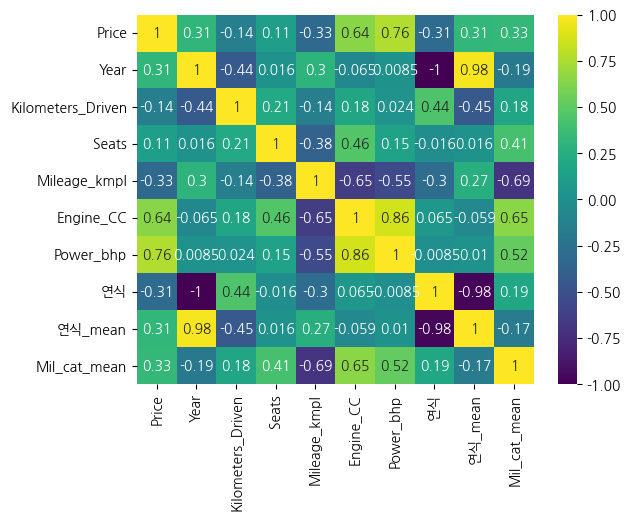

In [61]:
df_corr=df_train.corr()
sns.heatmap(df_corr, annot=True, cmap="viridis")

#### 회귀, 결정트리, 랜덤포레스트, 그래디언트부스팅, xgboost

In [62]:
df_train_reg = df_train.copy()

df_raw_dummy = pd.get_dummies(df_train_reg, drop_first = True)
df_raw_dummy.head()

train_df, test_df = train_test_split(df_raw_dummy, test_size = 0.3, random_state = 1234) 

In [63]:
import statsmodels.api as sm

# 회귀 모델 정의
formula = "Price ~ Kilometers_Driven  +  \
Power_bhp  + C(Owner_Type) + C(Brand) + C(Location) +\
C(Year_cat) + C(car_cat) + C(Mil_cat)  + C(Seats_5) + C(new_Year)"

reg_model = smf.ols(formula=formula, data=df_train_reg)

# 회귀 모델 적합
reg_result = reg_model.fit()

# 회귀 결과 요약 출력
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     434.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        15:04:15   Log-Likelihood:                -60724.
No. Observations:                5852   AIC:                         1.215e+05
Df Residuals:                    5806   BIC:                         1.218e+05
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [64]:
# 55 Page
# 다중공선성 재확인
df_train_x = df_train_reg[['Kilometers_Driven', 'Power_bhp']]

# statsmodels의 상수항 추가 함수 적용
df_train_x_const = add_constant(df_train_x) 

# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif["Variable"] = df_train_x_const.columns
df_vif["VIF"] = [variance_inflation_factor(df_train_x_const.values, i) \
                 for i in range(df_train_x_const.shape[1])]

# VIF 정렬
df_vif.sort_values("VIF", ascending = True).round(2)

,Variable,VIF
1,Kilometers_Driven,1.0
2,Power_bhp,1.0
0,const,8.0


## Year_cat<->Price Kruskal-Wallis 검정

In [65]:
import pandas as pd
from scipy.stats import kruskal

# 특정 연도 범주에 따른 가격 리스트를 준비
prices_before_2012 = df_train[df_train['Year_cat'] == '2012이전']['Price'].tolist()
prices_after_2012 = df_train[df_train['Year_cat'] == '2012이후']['Price'].tolist()

# Kruskal-Wallis 검정 실시
stat, p = kruskal(prices_before_2012, prices_after_2012)

print('Kruskal-Wallis H 검정 통계량 : {:.3f}'.format(stat))
print('p-value : {:.3f}'.format(p))

# 결과 해석
if p < 0.05:
    print('2012년 이전과 이후의 가격 중앙값 사이에는 통계적으로 유의미한 차이가 있습니다.')
else:
    print('통계적으로 유의미한 차이가 없습니다.')

Kruskal-Wallis H 검정 통계량 : 997.495
p-value : 0.000
2012년 이전과 이후의 가격 중앙값 사이에는 통계적으로 유의미한 차이가 있습니다.


## car_cat <-> Price

In [66]:
import pandas as pd
from scipy.stats import kruskal


# 각 자동차 크기 범주에 해당하는 가격의 데이터를 준비
prices_large = df_train[df_train['car_cat'] == '대형']['Price'].values
prices_small = df_train[df_train['car_cat'] == '소형']['Price'].values
prices_medium = df_train[df_train['car_cat'] == '중형']['Price'].values

# Kruskal-Wallis 검정 실시
stat, p = kruskal(prices_large, prices_small, prices_medium)

print('Kruskal-Wallis H 검정 통계량 : {:.3f}'.format(stat))
print('p-value : {:.3f}'.format(p))

# 결과 해석
if p < 0.05:
    print('세 자동차 범주(대형, 소형, 중형)의 가격 중앙값 사이에는 통계적으로 유의미한 차이가 있습니다.📊')
else:
    print('통계적으로 유의미한 차이가 없습니다.🤔')


Kruskal-Wallis H 검정 통계량 : 1931.811
p-value : 0.000
세 자동차 범주(대형, 소형, 중형)의 가격 중앙값 사이에는 통계적으로 유의미한 차이가 있습니다.📊


## Brand <-> price 비모수통계

In [67]:
import pandas as pd
from scipy.stats import kruskal


# 각 자동차 크기 범주에 해당하는 가격의 데이터를 준비
prices_1 = df_train[df_train['Brand'] == 'Maruti']['Price'].values
prices_2 = df_train[df_train['Brand'] == 'Hyundai']['Price'].values
prices_3 = df_train[df_train['Brand'] == 'Honda']['Price'].values
prices_4 = df_train[df_train['Brand'] == 'Toyota']['Price'].values
prices_5 = df_train[df_train['Brand'] == 'Volkswagen']['Price'].values
prices_6 = df_train[df_train['Brand'] == 'Mercedes-Benz']['Price'].values
prices_7 = df_train[df_train['Brand'] == 'Ford']['Price'].values
prices_8 = df_train[df_train['Brand'] == 'Mahindra']['Price'].values
prices_9 = df_train[df_train['Brand'] == 'BMW']['Price'].values
prices_10 = df_train[df_train['Brand'] == 'Audi']['Price'].values
prices_11 = df_train[df_train['Brand'] == 'Tata']['Price'].values
prices_12 = df_train[df_train['Brand'] == 'Skoda']['Price'].values
prices_13 = df_train[df_train['Brand'] == 'Renault']['Price'].values
prices_14 = df_train[df_train['Brand'] == 'Chevrolet']['Price'].values
prices_15 = df_train[df_train['Brand'] == 'Nissan']['Price'].values
prices_16 = df_train[df_train['Brand'] == 'Land']['Price'].values

# Kruskal-Wallis 검정 실시
stat, p = kruskal(prices_1 ,prices_2 ,prices_3 ,prices_4 
,prices_5 ,prices_6 ,prices_7 ,prices_8 
,prices_9 ,prices_10,prices_11,prices_12
,prices_13,prices_14,prices_15,prices_16)

print('Kruskal-Wallis H 검정 통계량 : {:.3f}'.format(stat))
print('p-value : {:.3f}'.format(p))

# 결과 해석
if p < 0.05:
    print('세 자동차 범주(대형, 소형, 중형)의 가격 중앙값 사이에는 통계적으로 유의미한 차이가 있습니다.📊')
else:
    print('통계적으로 유의미한 차이가 없습니다.🤔')


Kruskal-Wallis H 검정 통계량 : 2585.462
p-value : 0.000
세 자동차 범주(대형, 소형, 중형)의 가격 중앙값 사이에는 통계적으로 유의미한 차이가 있습니다.📊


## 그래프 그리기 

### Year_cat<->Price

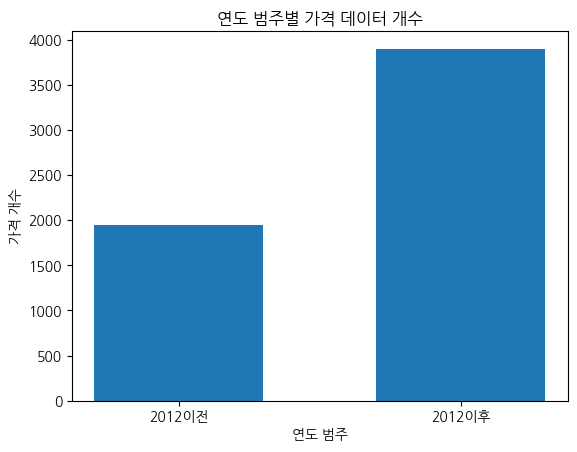

In [68]:
import matplotlib.pyplot as plt

# '2012이전'과 '2012이후'의 가격 데이터를 막대그래프로 나타내기 위한 데이터를 준비합니다.
labels = ['2012이전', '2012이후']
prices = [prices_before_2012, prices_after_2012]

# 그래프의 위치를 지정할 x축 좌표를 생성합니다.
x = range(len(labels))

# 막대그래프를 그립니다.
plt.bar(x, [len(prices_before_2012), len(prices_after_2012)], width=0.6, align='center')
plt.xticks(x, labels)

# 그래프에 레이블과 제목을 추가합니다.
plt.xlabel('연도 범주')
plt.ylabel('가격 개수')
plt.title('연도 범주별 가격 데이터 개수')

# 그래프를 화면에 표시합니다.
plt.show()

<Axes: xlabel='Year_cat', ylabel='count'>

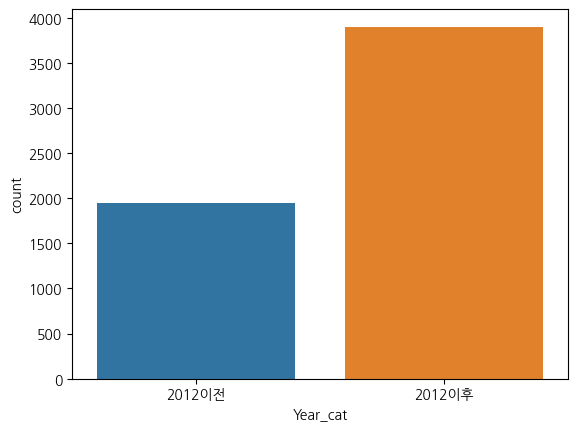

In [69]:
sns.countplot(x='Year_cat',data=df_train)

### car_cat <-> Price

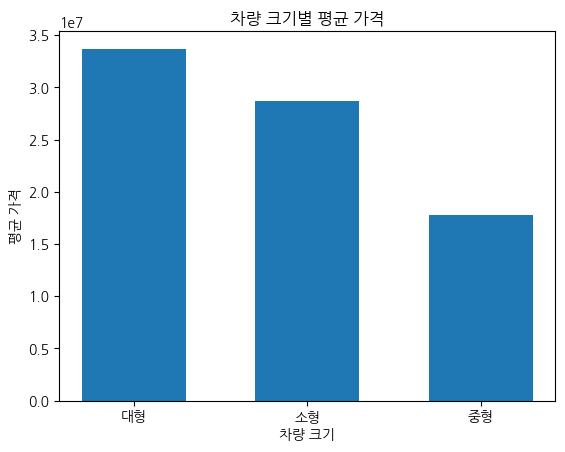

In [70]:
# 막대 그래프를 그리기 위한 레이블과 값 설정
labels = ['대형', '소형', '중형']
values = [sum(prices_large), sum(prices_small), sum(prices_medium)]

# X축 위치 설정
x = range(len(labels))

# 막대 그래프 그리기
plt.bar(x, values, width=0.6, align='center')

# X축에 레이블 설정
plt.xticks(x, labels)

# 그래프 제목 및 축 이름 설정
plt.title('차량 크기별 평균 가격')
plt.xlabel('차량 크기')
plt.ylabel('평균 가격')

# 그래프 표시
plt.show()

### Brand <-> price 

<Axes: xlabel='Brand', ylabel='count'>

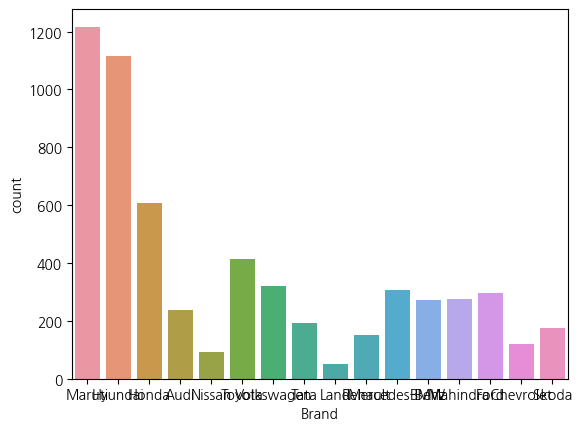

In [71]:
sns.countplot(x='Brand',data=df_train)

## 다중선형회귀분석

In [72]:
# 45 Page
# 데이터 구성:Series, DataFrame
import pandas as pd
# 행렬 연산
import numpy as np 
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 선형 회귀모델 formula(y ~ X1 + X2 + ...)
import statsmodels.formula.api as smf
# 잔차의 정규성 확인 :qqplot, 회귀분석의 상수항 추가 : add_constant
from statsmodels.api import qqplot, add_constant
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 학습용/평가용 데이터 분리:train, test
from sklearn.model_selection import train_test_split
# 선형회귀모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환->표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler
# 평가함수
from sklearn.metrics import r2_score

In [73]:
# 46 Page
# 맑은 고딕 적용
matplotlib.rc("font", family = "NanumGothic")
# 음수 표시
matplotlib.rc("axes", unicode_minus = False)

In [74]:
df_train.isnull().sum()

Location             0
Price                0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Mileage_kmpl         0
Engine_CC            0
Power_bhp            0
Brand                0
Year_cat             0
car_cat              0
연식                   0
연식_mean              0
가성비                  0
Mil_cat              0
Mil_cat_mean         0
Location_cat         0
Seats_5              0
new_Year             0
dtype: int64

In [75]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5852 entries, 0 to 5851
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5852 non-null   object 
 1   Price              5852 non-null   float64
 2   Year               5852 non-null   int64  
 3   Kilometers_Driven  5852 non-null   int64  
 4   Fuel_Type          5852 non-null   object 
 5   Transmission       5852 non-null   object 
 6   Owner_Type         5852 non-null   object 
 7   Seats              5852 non-null   float64
 8   Mileage_kmpl       5852 non-null   float64
 9   Engine_CC          5852 non-null   float64
 10  Power_bhp          5852 non-null   float64
 11  Brand              5852 non-null   object 
 12  Year_cat           5852 non-null   object 
 13  car_cat            5852 non-null   object 
 14  연식                 5852 non-null   int64  
 15  연식_mean            5852 non-null   float64
 16  가성비                5852 

In [76]:
df_train.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'Brand', 'Year_cat', 'car_cat', '연식', '연식_mean', '가성비',
       'Mil_cat', 'Mil_cat_mean', 'Location_cat', 'Seats_5', 'new_Year'],
      dtype='object')

In [77]:
# # 범주형 변수의 Dummy 변수화
# df_raw_dummy = pd.get_dummies(df_train, drop_first = True)
# df_raw_dummy.head()

In [78]:
# df_raw_dummy.columns

In [79]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Price', 'Year', 'Kilometers_Driven', 'Seats', 'Mileage_kmpl'],kind="reg")

In [80]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Engine_CC', 'Power_bhp', '연식', '연식_mean', 'Mil_cat_mean'],kind="reg")

In [81]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
#        'Location_Delhi', 'Location_Hyderabad'],kind="reg")

In [82]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Location_Jaipur',
#        'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
#        'Location_Pune'],kind="reg")

In [83]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Fuel_Type_Diesel', 'Fuel_Type_LPG',
#        'Fuel_Type_Petrol'],kind="reg")

In [84]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Transmission_Manual', 'Owner_Type_Fourth & Above',
#        'Owner_Type_Second', 'Owner_Type_Third'],kind="reg")

In [85]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Brand_BMW', 'Brand_Chevrolet',
#        'Brand_Ford', 'Brand_Honda', 'Brand_Hyundai'],kind="reg")

In [86]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Brand_Land',
#        'Brand_Mahindra', 'Brand_Maruti', 'Brand_Mercedes-Benz', 'Brand_Nissan'],kind="reg")

In [87]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Brand_Renault', 'Brand_Skoda', 'Brand_Tata', 'Brand_Toyota',
#        'Brand_Volkswagen'],kind="reg")

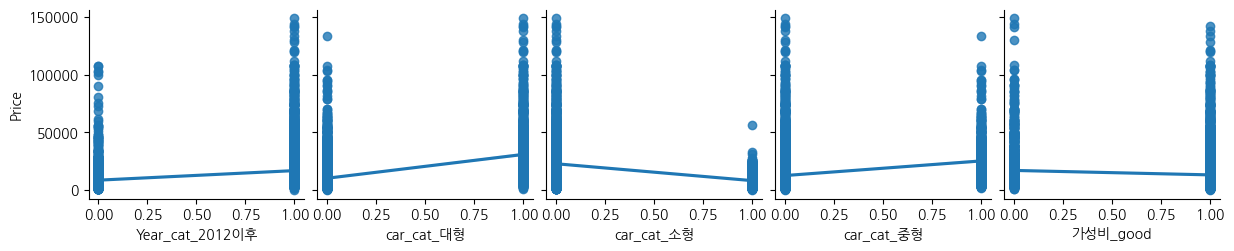

In [88]:
# 산점도 행렬:목표변수와 설명변수 지정
sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Year_cat_2012이후', 'car_cat_대형', 'car_cat_소형',
       'car_cat_중형', '가성비_good'],kind="reg")

In [89]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['Mil_cat_2등급 이하', 'Location_cat_low',
#        'Location_cat_medium', 'Seats_5_5 좌석', 'Seats_5_5 초과 좌석'],kind="reg")

In [90]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['new_Year_2012', 'new_Year_2013', 'new_Year_2014', 'new_Year_2015',
#        'new_Year_2016'],kind="reg")

In [91]:
# # 산점도 행렬:목표변수와 설명변수 지정
# sns.pairplot(df_raw_dummy, y_vars="Price", x_vars=['new_Year_2017', 'new_Year_2018', 'new_Year_2019',
#        'new_Year_2010년 이하'],kind="reg")

In [92]:
# # 상관관계 분석
# df_raw_dummy.corr().round(3)
# #상관계수

In [99]:
# train/test data 분리
df_train_1, df_test = train_test_split(df_train, test_size = 0.3, random_state = 1234) 
print("train data size : {}".format(df_train_1.shape))
print("test data size : {}".format(df_test.shape))

train data size : (4096, 22)
test data size : (1756, 22)


In [100]:
df_train_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4096 entries, 1423 to 2863
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           4096 non-null   object 
 1   Price              4096 non-null   float64
 2   Year               4096 non-null   int64  
 3   Kilometers_Driven  4096 non-null   int64  
 4   Fuel_Type          4096 non-null   object 
 5   Transmission       4096 non-null   object 
 6   Owner_Type         4096 non-null   object 
 7   Seats              4096 non-null   float64
 8   Mileage_kmpl       4096 non-null   float64
 9   Engine_CC          4096 non-null   float64
 10  Power_bhp          4096 non-null   float64
 11  Brand              4096 non-null   object 
 12  Year_cat           4096 non-null   object 
 13  car_cat            4096 non-null   object 
 14  연식                 4096 non-null   int64  
 15  연식_mean            4096 non-null   float64
 16  가성비                40

In [145]:
df_train_1.columns

Index(['Location', 'Price', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Seats', 'Mileage_kmpl', 'Engine_CC',
       'Power_bhp', 'Brand', 'Year_cat', 'car_cat', '연식', '연식_mean', '가성비',
       'Mil_cat', 'Mil_cat_mean', 'Location_cat', 'Seats_5', 'new_Year'],
      dtype='object')

In [153]:
# 선형 회귀 분석 : formula(y ~ X1 + X2 + ...) 이용. 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    C(Transmission)+C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(가성비)+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    C(Seats_5)+C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     264.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:32:46   Log-Likelihood:                -42422.
No. Observations:                4096   AIC:                         8.496e+04
Df Residuals:                    4040   BIC:                         8.531e+04
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [154]:
#선형회귀분석 : 모델에서 Transmission 제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(가성비)+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    C(Seats_5)+C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     269.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:33:14   Log-Likelihood:                -42422.
No. Observations:                4096   AIC:                         8.495e+04
Df Residuals:                    4041   BIC:                         8.530e+04
Df Model:                          54                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [158]:
#선형회귀분석 : 모델에서 가성비 제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    C(Seats_5)+C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     274.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:34:49   Log-Likelihood:                -42422.
No. Observations:                4096   AIC:                         8.495e+04
Df Residuals:                    4042   BIC:                         8.529e+04
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [160]:
#선형회귀분석 : 모델에서 Seats_5 제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +C(Owner_Type)+Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     283.6
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:36:56   Log-Likelihood:                -42435.
No. Observations:                4096   AIC:                         8.497e+04
Df Residuals:                    4044   BIC:                         8.530e+04
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

In [161]:
#선형회귀분석 : 모델에서 Owner_Type 제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+C(Fuel_Type)+\
                    +Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     300.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:38:44   Log-Likelihood:                -42440.
No. Observations:                4096   AIC:                         8.498e+04
Df Residuals:                    4047   BIC:                         8.529e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [162]:
#선형회귀분석 : 모델에서 Fuel_Type제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Mileage_kmpl+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     316.8
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:39:29   Log-Likelihood:                -42460.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4050   BIC:                         8.530e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [163]:
#선형회귀분석 : 모델에서 Mileage_kmpl제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(Mil_cat)+Mil_cat_mean+C(Location_cat)+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:40:14   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [164]:
#선형회귀분석 : 모델에서 Mileage_kmpl제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+C(Mil_cat)+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:40:51   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [165]:
#선형회귀분석 : 모델에서Mil_cat제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식+연식_mean+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:41:41   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [166]:
#선형회귀분석 : 모델에서 연식 제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Year+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식_mean+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     323.9
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:42:02   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4051   BIC:                         8.530e+04
Df Model:                          44                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [167]:
#선형회귀분석 : 모델에서 Year 제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+연식_mean+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     331.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:42:34   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4052   BIC:                         8.529e+04
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [170]:
#선형회귀분석 : 모델에서 연식_mean제거 
reg_model = smf.ols(formula = "Price ~ C(Location)+Kilometers_Driven+\
                    +Seats+Engine_CC+Power_bhp+C(Brand)+\
                    C(Year_cat)+C(car_cat)+Mil_cat_mean+\
                    +C(new_Year)", data = df_train_1)
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     339.4
Date:                Sun, 10 Mar 2024   Prob (F-statistic):               0.00
Time:                        16:43:43   Log-Likelihood:                -42461.
No. Observations:                4096   AIC:                         8.501e+04
Df Residuals:                    4053   BIC:                         8.528e+04
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

In [171]:
# 평가용 데이터에 대한 성능 확인
train_pred = reg_result.predict(df_train_1)
test_pred = reg_result.predict(df_test)
print("train data의 결정계수:", r2_score(df_train_1['Price'], train_pred))
print("test data의 결정계수:", r2_score(df_test['Price'], test_pred))

train data의 결정계수: 0.7785972563942054
test data의 결정계수: 0.7439668435660227


## Location별 계수비교 

<Axes: >

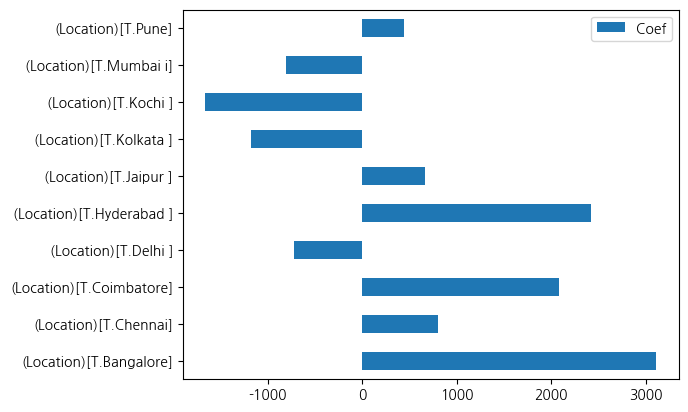

In [208]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:11]},  
#                            index=[
# '(Location)[T.Bangalore]'  
                               
# ,'(Location)[T.Chennai]'    
                               
# ,'(Location)[T.Coimbatore]'   
                               
# ,'(Location)[T.Delhi ]'        
                               
# ,'(Location)[T.Hyderabad ]'    
                               
# ,'(Location)[T.Jaipur ]'  
                               
# ,'(Location)[T.Kolkata ]'      
                               
# ,'(Location)[T.Kochi ]'    
                               
# ,'(Location)[T.Mumbai i]'    
                               
# ,'(Location)[T.Pune]'])
# df_reg_coef.plot.barh(y = "Coef")

- Bangalore, Chennai, Coimbatore, Hyderabad, Jaipur, Pune: 양수의 회귀 계수

-> 중고차 가격에 긍정적인 영향을 미칩니다.

-> 이 도시들에 위치한 중고차는 보다 높은 가격으로 거래될 가능성이 있습니다.

- Delhi, Kochi, Kolkata, Mumbai: 음수의 회귀 계수

-> 중고차 가격에 부정적인 영향을 미칩니다

-> 이 도시들에 위치한 중고차는 다른 도시에 비해 상대적으로 낮은 가격으로 거래될 가능성이 있습니다. 

## 브랜드별 영향력 분석

<Axes: >

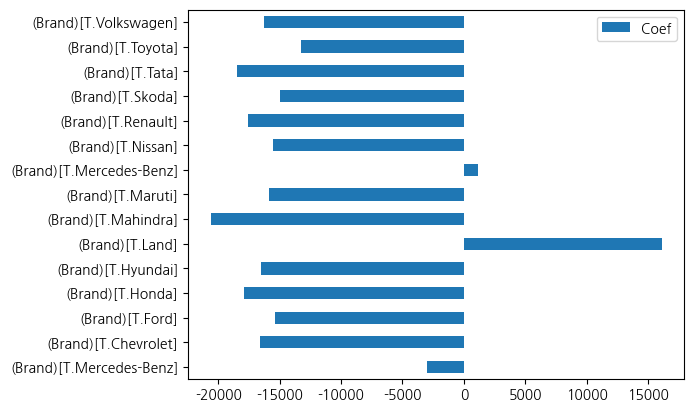

In [210]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[11:26]},  
#                            index=[  
# '(Brand)[T.Mercedes-Benz]'           
# ,'(Brand)[T.Chevrolet]'     
# ,'(Brand)[T.Ford]'          
# ,'(Brand)[T.Honda]'         
# ,'(Brand)[T.Hyundai]'       
# ,'(Brand)[T.Land]'          
# ,'(Brand)[T.Mahindra]'      
# ,'(Brand)[T.Maruti]'        
# ,'(Brand)[T.Mercedes-Benz]' 
# ,'(Brand)[T.Nissan]'        
# ,'(Brand)[T.Renault]'       
# ,'(Brand)[T.Skoda]'         
# ,'(Brand)[T.Tata]'          
# ,'(Brand)[T.Toyota]'        
# ,'(Brand)[T.Volkswagen]'    
# ])
# df_reg_coef.plot.barh(y = "Coef")

- BMW
: BMW 브랜드의 회귀 계수는 -3003.3145로 음수 
-> 이는 BMW 브랜드가 중고차 가격을 부정적으로 영향을 미치는 것을 나타냅니다.
-> 즉, BMW 브랜드의 차량은 다른 브랜드의 차량에 비해 상대적으로 낮은 가격으로 거래될 가능성이 있습니다.


- Chevrolet, Ford, Honda, Hyundai, Mahindra, Maruti, Nissan, Renault, Skoda, Tata, Toyota, Volkswagen
: 이들 브랜드의 회귀 계수는 모두 음수입니다. 
-> 이는 이러한 브랜드의 차량이 중고차 가격에 부정적인 영향을 미친다는 것을 의미합니다. 
-> 따라서 이러한 브랜드의 차량은 다른 브랜드의 차량에 비해 상대적으로 낮은 가격으로 거래될 가능성이 있습니다.


- Land, Mercedes-Benz
: Land Rover와 Mercedes-Benz 브랜드의 회귀 계수는 양수입니다. 
-> 이는 이러한 브랜드의 차량이 중고차 가격을 긍정적으로 영향을 미친다는 것을 의미합니다. 
-> 즉, 이러한 브랜드의 차량은 다른 브랜드의 차량에 비해 높은 가격으로 거래될 가능성이 있습니다.


<Axes: >

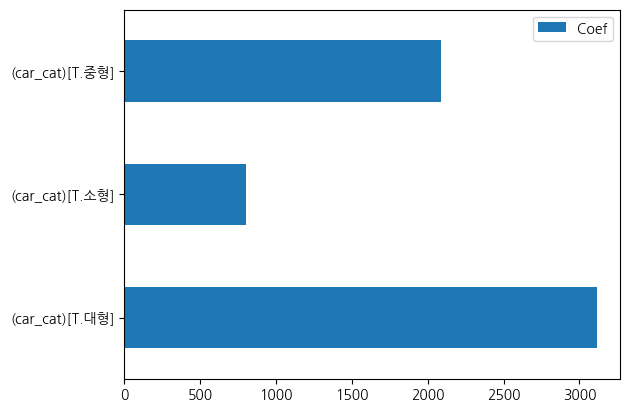

In [201]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:4]},  
#                            index=[      
# '(car_cat)[T.대형]'          
# ,'(car_cat)[T.소형]'          
# ,'(car_cat)[T.중형]'])
# df_reg_coef.plot.barh(y = "Coef")

- 대형
: 대형 자동차의 회귀 계수는 -1054.2259로 음수입니다. 
-> 이는 대형 자동차가 중고차 가격을 부정적으로 영향을 미치는 것을 나타냅니다. 
-> 즉, 대형 자동차는 소형이나 중형 자동차에 비해 상대적으로 낮은 가격으로 거래될 가능성이 있습니다.

- 소형 
: 소형 자동차의 회귀 계수는 -1823.0796로 음수입니다. 
-> 이는 소형 자동차가 중고차 가격을 부정적으로 영향을 미치는 것을 나타냅니다. 
-> 따라서 소형 자동차는 대형이나 중형 자동차에 비해 상대적으로 낮은 가격으로 거래될 가능성이 있습니다.

- 중형 
: 중형 자동차의 회귀 계수는 -3953.4788로 음수입니다. 
-> 이는 중형 자동차가 중고차 가격을 부정적으로 영향을 미치는 것을 나타냅니다. 
-> 따라서 중형 자동차는 대형이나 소형 자동차에 비해 상대적으로 낮은 가격으로 거래될 가능성이 있습니다.

<Axes: >

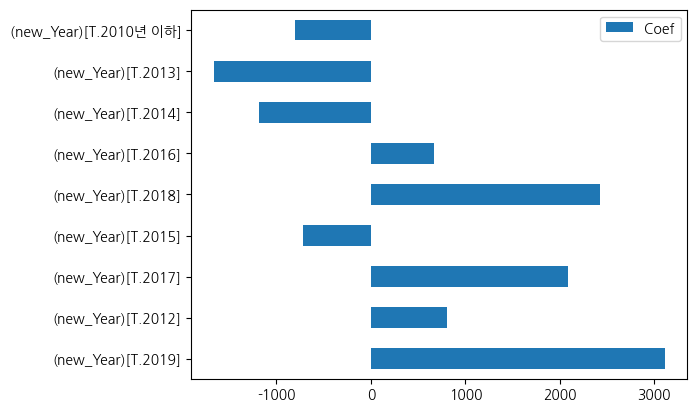

In [206]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:10]},  
#                            index=[                
# '(new_Year)[T.2019]'       
# ,'(new_Year)[T.2012]'      
# ,'(new_Year)[T.2017]'       
# ,'(new_Year)[T.2015]'       
# ,'(new_Year)[T.2018]'       
# ,'(new_Year)[T.2016]'       
# ,'(new_Year)[T.2014]'       
# ,'(new_Year)[T.2013]'       
# ,'(new_Year)[T.2010년 이하]'])
# df_reg_coef.plot.barh(y = "Coef")

- 2018년과 2019년에는 눈에 띄게 큰 긍정적인 영향을 준 것으로 나타난다.


- 2013년과 2014년은 중고차 가격에 부정적인 영향을 주었음

<Axes: >

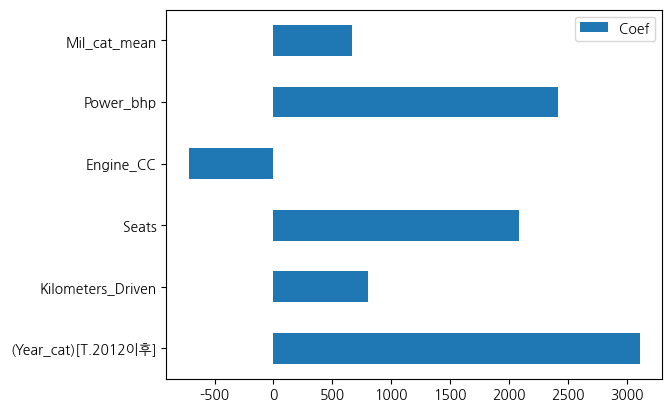

In [199]:
# df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values[1:7]},  
# ,index = log_model.exog_names[1:
# df_reg_coef.plot.barh(y = "Coef")

<Axes: >

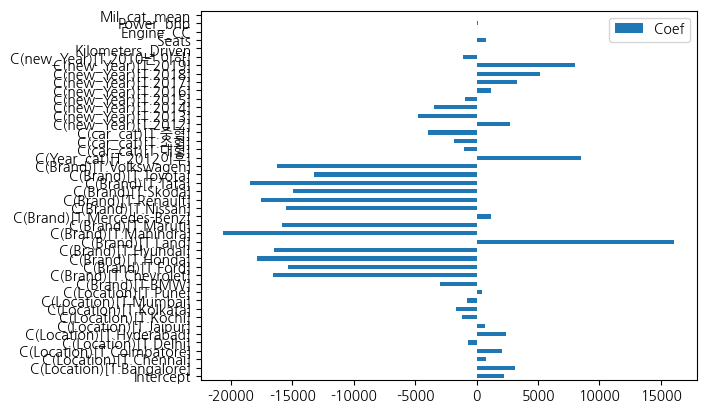

In [213]:
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values}, index=reg_result.params.index)
df_reg_coef.plot.barh(y="Coef")

## 다중선형회귀 해석

<Axes: >

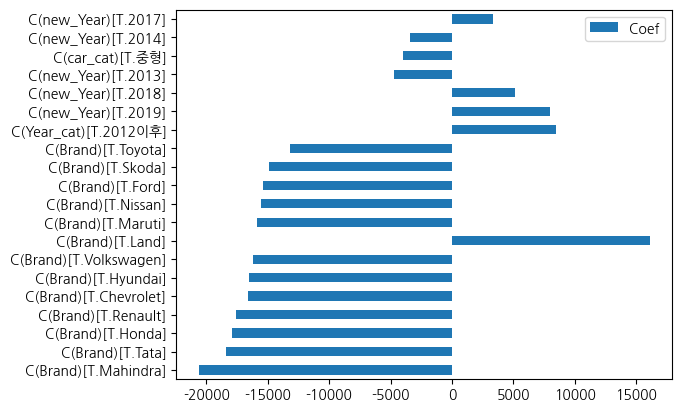

In [223]:
import pandas as pd

# 주어진 데이터프레임 생성
df_reg_coef = pd.DataFrame({"Coef": reg_result.params.values}, index=reg_result.params.index)

# Coef 값의 절댓값을 기준으로 내림차순 정렬 후 상위 20개 선택
top_20_variables = df_reg_coef['Coef'].abs().nlargest(20)

# 선택된 변수로 DataFrame 생성
df_top_20_variables = df_reg_coef.loc[top_20_variables.index]

# 상위 20개 변수에 대한 그래프 그리기
df_top_20_variables.plot.barh(y="Coef")

1) 상위20개 데이터를 그래프로 시각화 한 결과, 중고차 가격에 영향을 미치는 주요 요인으로는 브랜드, 연식, 차량의 종류 등이 있다고 볼 수 있음.

2) Land브랜드는 중고차 시장에서 (1.61e+04 )로 높은 가격대의 차량을 나타내는 반면, Mahindra브랜드는 (-2.061e+04)로 중고차 시장에서 상대적으로 낮은 가격대의 차량을 나타냄. 

3) new_Year(2017), new_Year(2018), 그리고 new_Year(2019)가 모두 양의 회귀 계수를 가지고 있으므로, 이들은 중고차의 연식이 증가함에 따라 중고차의 가격이 상승한다는 것을 알 수 있음. 

4) 차량의 종류는 중형이 음의 계수로 가장 높은 영향을 띔. 중형 차량의 크기가 중고차의 가격에 부정적인 영향을 미친다는 것을 알 수 있음